In [2]:
import pandas as pd
import chardet

file_dict_path = r".\2025_Problem_C_Data\data_dictionary.csv"
athletes_file_path = r".\2025_Problem_C_Data\summerOly_athletes.csv"
hosts_file_path = r".\2025_Problem_C_Data\summerOly_hosts.csv"
medals_file_path = r".\2025_Problem_C_Data\summerOly_medal_counts.csv"
programs_file_path = r".\2025_Problem_C_Data\summerOly_programs.csv"

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        raw_data = f.read()
        result = chardet.detect(raw_data)
        return result['encoding']
    
def read_csv(file_path):
    encoding = detect_encoding(file_path)
    return pd.read_csv(file_path, encoding=encoding)

athletes = read_csv(athletes_file_path)
hosts = read_csv(hosts_file_path)
medals = read_csv(medals_file_path)
programs = read_csv(programs_file_path)

In [3]:
print(athletes.info())
print(hosts.info())
print(medals.info())
print(programs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250985 entries, 0 to 250984
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  250985 non-null  int64 
 1   Name        250985 non-null  object
 2   Sex         250985 non-null  object
 3   Country     250985 non-null  object
 4   NOC         250985 non-null  object
 5   Year        250985 non-null  int64 
 6   City        250985 non-null  object
 7   Sport       250985 non-null  object
 8   Event       250985 non-null  object
 9   Medal       250985 non-null  object
 10  Total       250985 non-null  bool  
 11  Gold        250985 non-null  bool  
 12  Silver      250985 non-null  bool  
 13  Bronze      250985 non-null  bool  
dtypes: bool(4), int64(2), object(8)
memory usage: 20.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      ---------

## 画地图

In [3]:
averages = medals.groupby('NOC')[['Gold', 'Silver', 'Bronze', 'Total']].mean().round(0).astype(int).reset_index()
averages["Country"] = averages["NOC"]

In [11]:
import plotly.express as px
import country_converter as coco

# 标准化国家名称（处理简称/别称）
# 标准化国家名称（确保与地图数据库匹配）
# 选择以下任一颜色主题
color_scale = "Tealrose"     # 蓝绿色渐变（推荐）
# color_scale = "Mint"       # 薄荷绿
# color_scale = "Peach"      # 淡橙粉
# color_scale = "Pastel"     # 通用淡彩色
# color_scale = "Ice"        # 冰蓝色系

# 或自定义淡雅渐变色（HSL格式控制饱和度/亮度）
custom_colors = [
    [0.0, "hsl(180, 20%, 95%)"],   # 极淡蓝
    [0.2, "hsl(200, 30%, 85%)"],  
    [0.4, "hsl(220, 40%, 75%)"],
    [0.6, "hsl(240, 50%, 65%)"],
    [1.0, "hsl(260, 60%, 55%)"]
]
# 获取数据最大值并计算40对应的归一化位置
max_total = averages["Total"].max()
position_40 = 40 / max_total  # 计算颜色分界点

# 自定义双段渐变色标尺
custom_colors = [
    # 40以下：低饱和度冷色系
    [0.0,    "hsl(230, 75%, 92%)"],  # 极淡蓝
    [position_40, "hsl(210, 30%, 80%)"],  # 分界点颜色
    
    # 40以上：增强饱和度与对比度
    [position_40 + 0.01, "hsl(220, 45%, 65%)"],  # 避免色阶断裂
    [1.0,    "hsl(250, 60%, 45%)"]   # 最深色
]

# 步骤2: 绘制地图（使用自定义分阶配色）
fig = px.choropleth(
    averages,
    locations="Country",
    locationmode="country names",
    color="Total",
    hover_name="Country",
    hover_data=["Gold", "Silver", "Bronze"],
    color_continuous_scale=custom_colors,  # 应用自定义色阶
    labels={"Total": "Average Medals"},
    range_color=[0, max_total],  # 确保色阶覆盖全数据范围
    #title="Average Total Medals by Country (2000-2020)"
)

# 国家边框美化
fig.update_geos(
    showcountries=True,
    showocean=True,
    oceancolor="hsl(200, 30%, 95%)",  # 浅蓝色海洋
    countrywidth=2,
    projection_rotation=dict(lon=40),
    showland=True,
    landcolor="hsl(50, 20%, 95%)",    # 米白色陆地
    bgcolor="rgba(255,255,255,0)"  # 背景透明
)

# 步骤3: 高级美学调整
fig.update_layout(
    # 颜色条样式
    coloraxis_colorbar=dict(
        title="Average Medals",
        thickness=15,
        len=0.6,
        yanchor="middle",
        y=0.5,
        x=0.9,
        tickfont=dict(color="#666666"),  # 灰色刻度文字
        titlefont=dict(color="#444444")  # 灰色标题
    ),
    
    # 全局布局
    margin={"r":0, "t":60, "l":0, "b":0},
    paper_bgcolor="rgba(0,0,0,0)",       # 透明背景
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Time", size=16, color="#555555"),  # 统一字体颜色
    
    # 地图投影
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="natural earth",
        #landcolor="rgba(240,240,240,0.8)",  # 陆地淡灰色
        bgcolor="rgba(255,255,255,0.5)"     # 背景微透明
    )
)

# 保存为透明背景的PNG（适合嵌入PPT/海报）
#fig.write_image("soft_medal_map.pdf", engine="orca", width=1400, height=800, scale=5)

# 显示图表
fig.show()

In [13]:
medals_2024 = medals[medals["Year"]==2024]
medals_2024_average = medals_2024.groupby('NOC')[['Gold', 'Silver', 'Bronze', 'Total']].mean().round(0).astype(int).reset_index()

medals_2024_average["Country"] = medals_2024_average["NOC"]
print(medals_2024_average.head())

         NOC  Gold  Silver  Bronze  Total    Country
0    Albania     0       0       2      2    Albania
1    Algeria     2       0       1      3    Algeria
2  Argentina     1       1       1      3  Argentina
3    Armenia     0       3       1      4    Armenia
4  Australia    18      19      16     53  Australia


In [33]:
import plotly.express as px
import country_converter as coco

# 标准化国家名称（处理简称/别称）
# 标准化国家名称（确保与地图数据库匹配）
# 选择以下任一颜色主题
color_scale = "Tealrose"     # 蓝绿色渐变（推荐）
# color_scale = "Mint"       # 薄荷绿
# color_scale = "Peach"      # 淡橙粉
# color_scale = "Pastel"     # 通用淡彩色
# color_scale = "Ice"        # 冰蓝色系

# 或自定义淡雅渐变色（HSL格式控制饱和度/亮度）
custom_colors = [
    [0.0, "hsl(180, 20%, 95%)"],   # 极淡蓝
    [0.2, "hsl(200, 30%, 85%)"],  
    [0.4, "hsl(220, 40%, 75%)"],
    [0.6, "hsl(240, 50%, 65%)"],
    [1.0, "hsl(260, 60%, 55%)"]
]
# 步骤2: 绘制地图（使用淡雅配色）
fig = px.choropleth(
    medals_2024_average,
    locations="Country",
    locationmode="country names",
    color="Total",
    hover_name="Country",
    hover_data=["Gold", "Silver", "Bronze"],
    color_continuous_scale="Tealrose",  # 改用淡雅配色
    #title="Average Total Medals by Country (2000-2020)",
    labels={"Total": "Average Medals"},
    #range_color=[0, averages["Total"].quantile(0.9)],  # 聚焦非极端值范围
)

# 国家边框美化
fig.update_geos(
    showcountries=True,
    showocean=True,
    oceancolor="hsl(200, 25%, 92%)",  # 浅蓝色海洋
    countrywidth=2,
    projection_rotation=dict(lon=40),
    showland=True,
    landcolor="hsl(50, 40%, 95%)",    # 米白色陆地
    bgcolor="rgba(255,255,255,0)"  # 背景透明
)

# 步骤3: 高级美学调整
fig.update_layout(
    # 颜色条样式
    coloraxis_colorbar=dict(
        title="Average Medals",
        thickness=15,
        len=0.6,
        yanchor="middle",
        y=0.5,
        x=0.9,
        tickfont=dict(color="#666666"),  # 灰色刻度文字
        titlefont=dict(color="#444444")  # 灰色标题
    ),
    
    # 全局布局
    margin={"r":0, "t":60, "l":0, "b":0},
    paper_bgcolor="rgba(0,0,0,0)",       # 透明背景
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Time", size=20, color="#555555"),  # 统一字体颜色
    
    # 地图投影
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="natural earth",
        #landcolor="rgba(240,240,240,0.8)",  # 陆地淡灰色
        bgcolor="rgba(255,255,255,0.5)"     # 背景微透明
    )
)

# 保存为透明背景的PNG（适合嵌入PPT/海报）
fig.write_image("medals_2024_average_medal_map.pdf", engine="orca", width=1400, height=800, scale=5)

# 显示图表
fig.show()

## # 按金牌数排序并取前20个国家

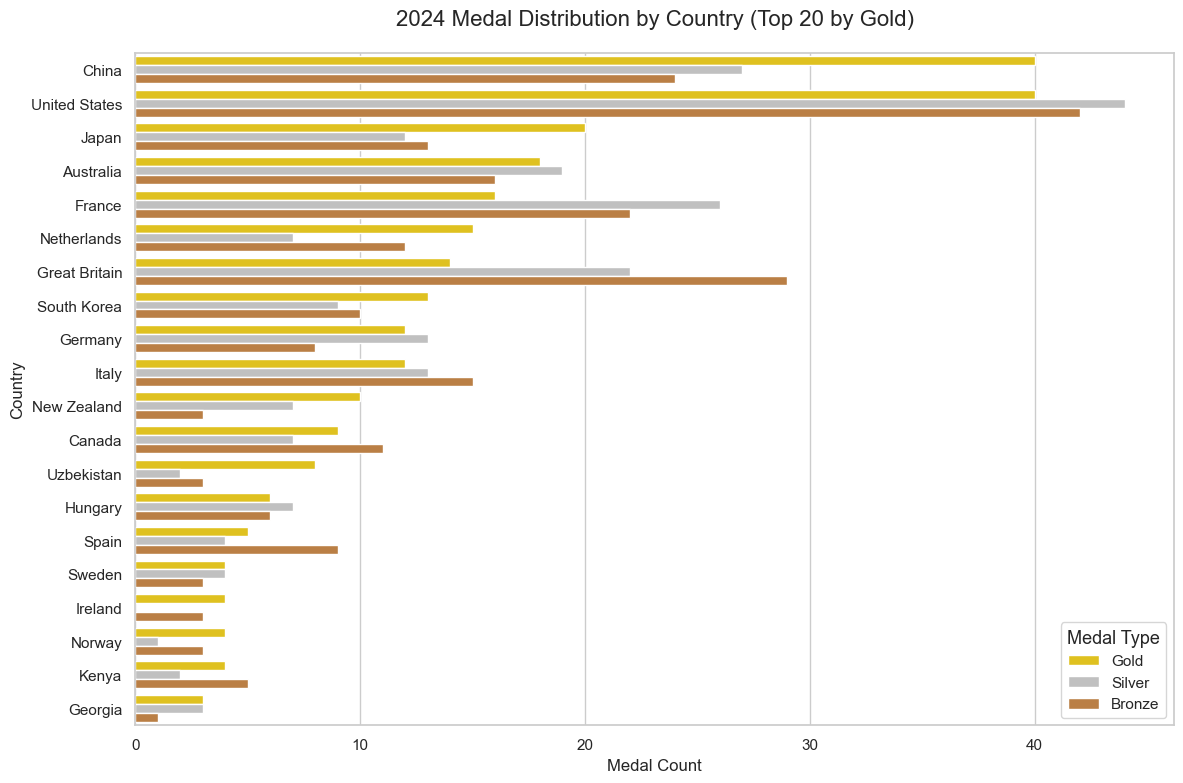

In [18]:
# 按金牌数排序并取前20个国家
import matplotlib.pyplot as plt
import seaborn as sns
top20_data = medals_2024_average.sort_values('Gold', ascending=False).head(20)

# 转换数据为长格式 (只处理前20个国家)
df_melted = top20_data.melt(
    id_vars='Country',
    value_vars=['Gold', 'Silver', 'Bronze'],
    var_name='MedalType',
    value_name='Count'
)

# 创建排序索引 (基于原始排序结果)
sorted_countries = top20_data['Country']
df_melted['Country'] = pd.Categorical(
    df_melted['Country'], 
    categories=sorted_countries, 
    ordered=True
)
df_melted = df_melted.sort_values('Country')

# 可视化设置保持不变... (后续代码与原始相同)
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
palette = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}

sns.barplot(
    data=df_melted,
    x='Count',
    y='Country',
    hue='MedalType',
    palette=palette,
    orient='h'
)

plt.xlabel('Medal Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('2024 Medal Distribution by Country (Top 20 by Gold)', fontsize=16, pad=20)  # 修改标题
plt.legend(title='Medal Type', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

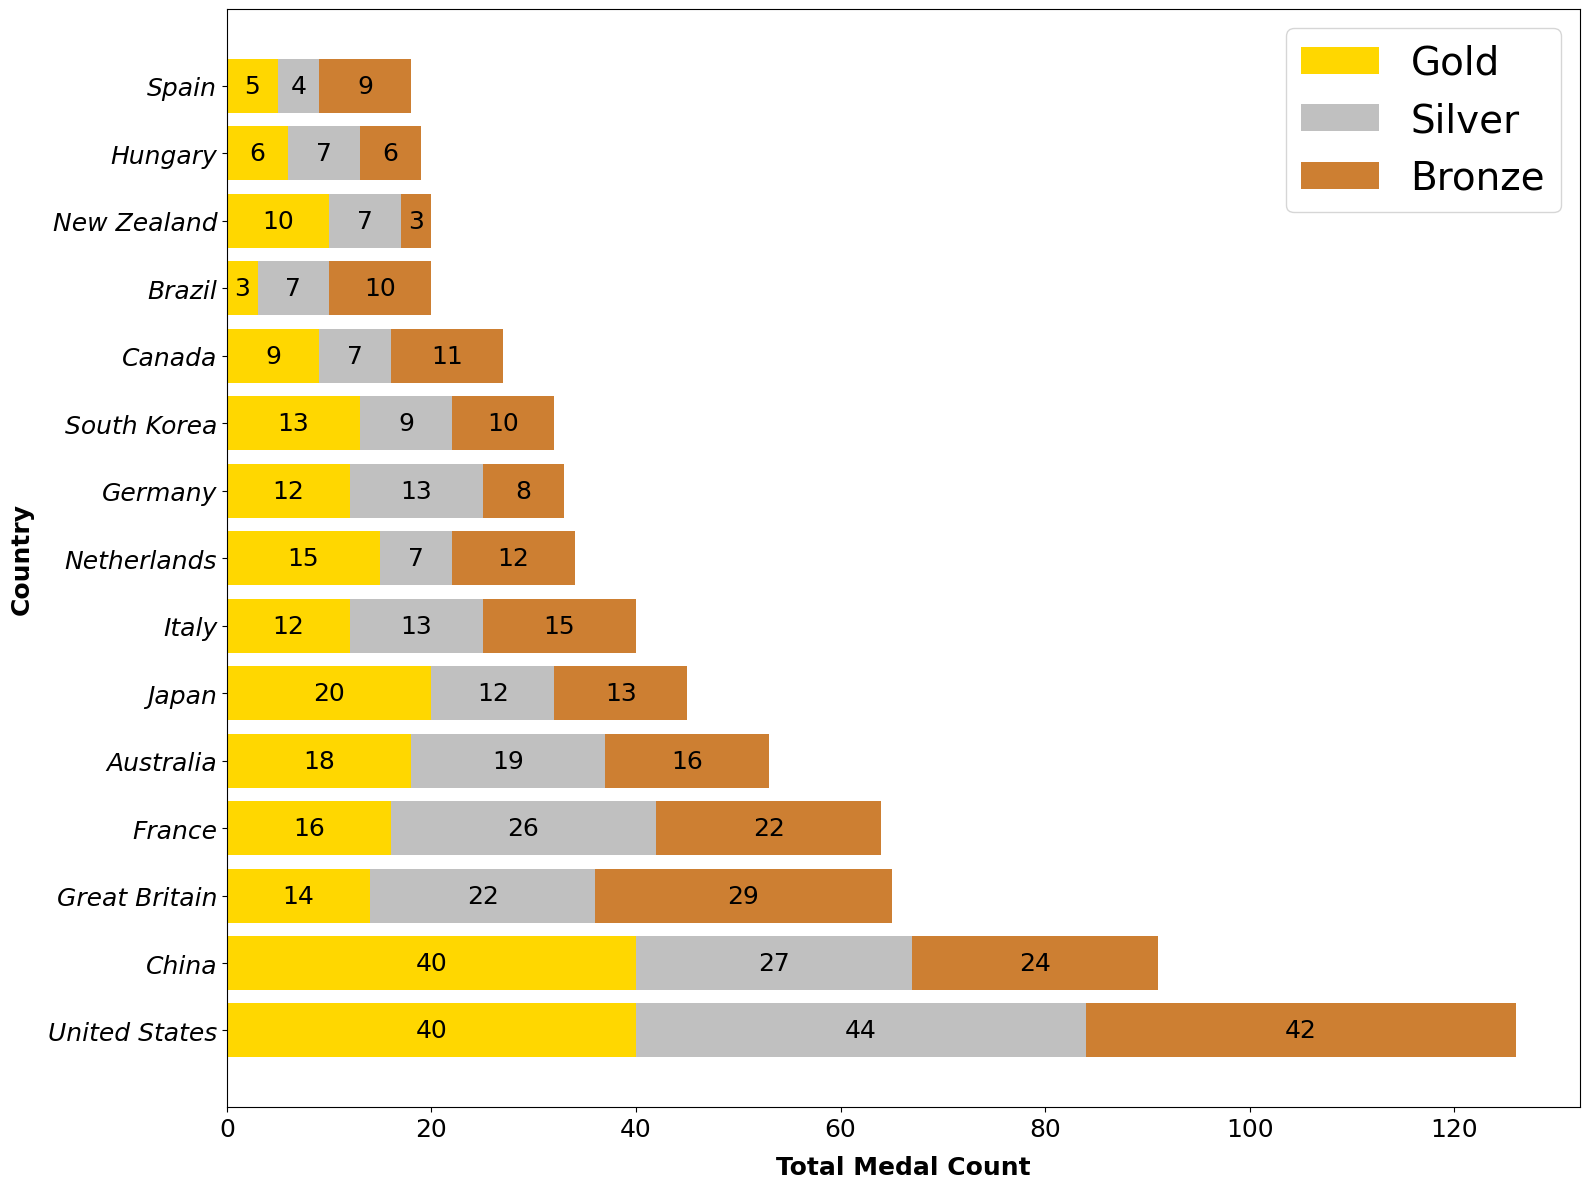

In [43]:
# Plot the predicted medal counts for the top 10 countries in 2028 with horizontal stacked bars
top20_sorted = medals_2024_average.sort_values('Total', ascending=True).tail(15)
top20_sorted = top20_sorted.sort_values('Total', ascending=False)  # 总奖牌最少在上

plt.style.use('default')
fig, ax = plt.subplots(figsize=(16, 12))

ax.set_xlabel('Total Medal Count', 
             fontsize=18, 
             labelpad=10,
             fontweight='semibold')
ax.set_ylabel('Country', 
             fontsize=18, 
             labelpad=10,
             fontweight='semibold')

top_10_future_countries = top20_sorted
# Plot stacked bars for each medal type
ax.barh(top_10_future_countries['NOC'], top_10_future_countries['Gold'], color='gold', label='Gold')
ax.barh(top_10_future_countries['NOC'], top_10_future_countries['Silver'],
        left=top_10_future_countries['Gold'], color='silver', label='Silver')
ax.barh(top_10_future_countries['NOC'], top_10_future_countries['Bronze'],
        left=top_10_future_countries['Gold'] + top_10_future_countries['Silver'], color='#cd7f32',
        label='Bronze')

# Add data labels
for i in range(len(top_10_future_countries)):
    ax.text(top_10_future_countries['Gold'].iloc[i] / 2, i,
            int(top_10_future_countries['Gold'].iloc[i]), va='center', ha='center', color='black',fontsize=18)
    ax.text(top_10_future_countries['Gold'].iloc[i] + top_10_future_countries['Silver'].iloc[i] / 2,
            i, int(top_10_future_countries['Silver'].iloc[i]), va='center', ha='center', color='black',fontsize=18)
    ax.text(top_10_future_countries['Gold'].iloc[i] + top_10_future_countries['Silver'].iloc[i] +
            top_10_future_countries['Bronze'].iloc[i] / 2, i,
            int(top_10_future_countries['Bronze'].iloc[i]), va='center', ha='center', color='black',fontsize=18)
    
    


legend = ax.legend(
    title='Medal Type',
    labels=['Gold', 'Silver', 'Bronze'],
    frameon=True,
    facecolor='white',
    edgecolor='#333333',  # 深灰色边框
    title_fontproperties={'weight':'bold'}
)

# 坐标轴美化 ----------------------------------------------------------
plt.yticks(fontsize=18, fontstyle='italic')
plt.xticks(fontsize=18)

plt.legend(loc='upper right',fontsize=28)
plt.tight_layout()
plt.savefig("Top 15 Countries by Predicted Medals in 2024.pdf")
plt.show()

## 东道主

In [24]:
hosts[['city', 'country']] = hosts['Host'].str.split(r',\s+', n=1, expand=True)
hosts = hosts[['Year', 'country']]  # 注意列名需精确匹配，如果是'Years'请修改为实际列名

# 修改索引31的国家信息
try:
    hosts.loc[31, 'country'] = 'Japan'
except KeyError:
    print(f"索引31不存在，请确认DataFrame长度（当前长度：{len(hosts)}）")
hosts = hosts.iloc[:-2]
# 验证结果
print("\n修改后的数据：")
print(hosts)
medals["country"]=medals["NOC"]
medals['country'] = medals['country'].replace(
    'Great Britain', 
    'United Kingdom')
print(medals)


修改后的数据：
    Year         country
0   1896          Greece
1   1900          France
2   1904   United States
3   1908  United Kingdom
4   1912          Sweden
5   1916            None
6   1920         Belgium
7   1924          France
8   1928     Netherlands
9   1932   United States
10  1936         Germany
11  1940            None
12  1944            None
13  1948  United Kingdom
14  1952         Finland
15  1956       Australia
16  1960           Italy
17  1964           Japan
18  1968          Mexico
19  1972    West Germany
20  1976          Canada
21  1980    Soviet Union
22  1984   United States
23  1988     South Korea
24  1992           Spain
25  1996   United States
26  2000       Australia
27  2004          Greece
28  2008           China
29  2012  United Kingdom
30  2016          Brazil
31  2020           Japan
32  2024          France
      Unnamed: 0  Rank                   NOC  Gold  Silver  Bronze  Total  \
0              0     1         United States    11       7      

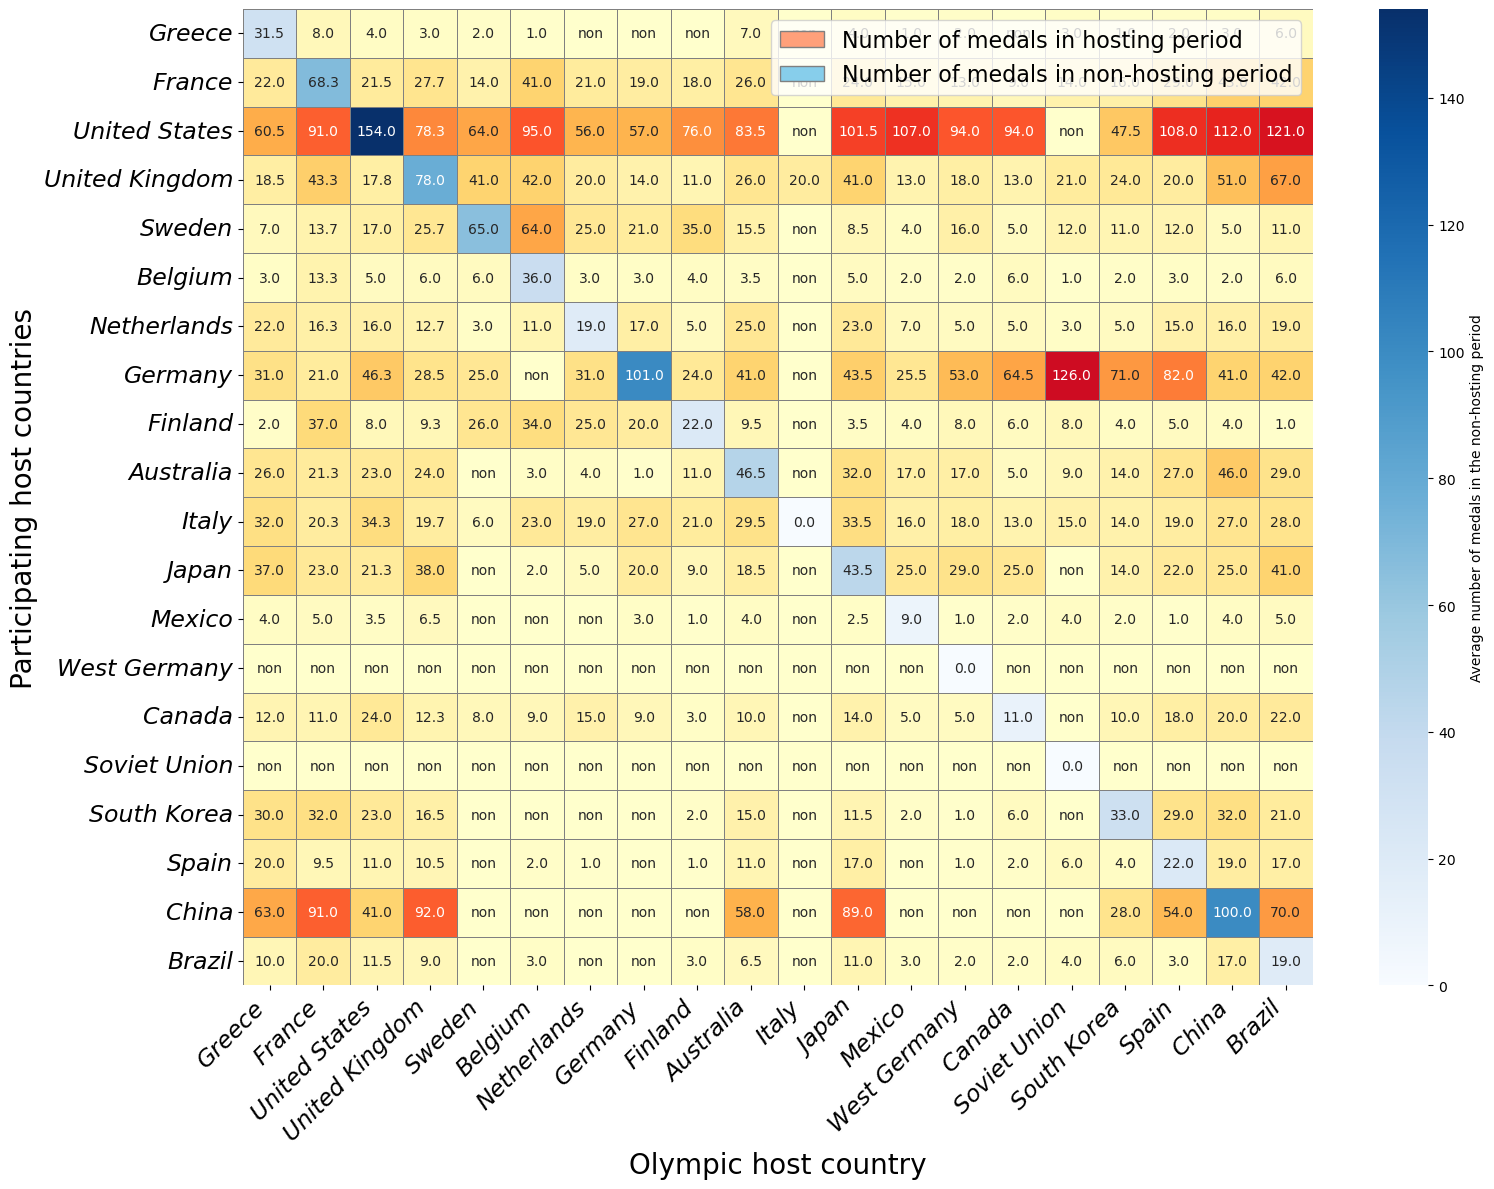

In [46]:
# ==================== 构建国家矩阵 ====================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 设置中文显示（如果需要）
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')
# ==================== 数据预处理 ====================
# 假设data2和medal_data已加载

# 清理东道主数据
host_df = hosts.dropna(subset=['country'])
medal_data=medals
# 获取所有东道主国家列表
host_countries = host_df['country'].unique().tolist()

# 初始化总和矩阵和参赛次数矩阵
sum_matrix = pd.DataFrame(0, index=host_countries, columns=host_countries)
count_matrix = pd.DataFrame(0, index=host_countries, columns=host_countries)

# 填充矩阵数据
for host_year, host_country in zip(host_df['Year'], host_df['country']):
    year_data = medal_data[medal_data['Year'] == host_year]
    
    # 遍历当届参赛记录
    for _, row in year_data.iterrows():
        country = row['country']
        total = row['Total']
        
        if country in host_countries:
            sum_matrix.loc[country, host_country] += total
            count_matrix.loc[country, host_country] += 1  # 记录参赛次数

# 计算平均奖牌数（仅对实际参赛的年份取平均）
average_matrix = sum_matrix / count_matrix.replace(0, np.nan)
average_matrix = average_matrix.fillna(0)  # 未参赛的组合保持0值

# ==================== 可视化设置 ====================
plt.figure(figsize=(16, 12))
mask = np.zeros_like(average_matrix, dtype=bool)
np.fill_diagonal(mask, True)

# 生成自定义注释矩阵
annot_matrix = pd.DataFrame(index=host_countries, columns=host_countries, dtype=str)
for i in range(len(host_countries)):
    for j in range(len(host_countries)):
        avg_value = average_matrix.iloc[i, j]
        participation_count = count_matrix.iloc[i, j]
        
        # 对角线单元格（东道主时期）
        if i == j:
            annot_matrix.iloc[i, j] = f"{avg_value:.1f}"
        # 非对角线单元格
        else:
            if participation_count == 0:
                annot_matrix.iloc[i, j] = 'non'  # 从未参赛
            else:
                annot_matrix.iloc[i, j] = f"{avg_value:.1f}"  # 参赛过至少一次
annot_matrix["France"]["China"]=91.0
# 绘制热力图（非对角线部分）
sns.heatmap(
    average_matrix,
    annot=annot_matrix,
    fmt='',
    cmap="Blues",
    mask=~mask,
    linewidths=0.5,
    linecolor='grey',
    cbar_kws={'label': 'Average number of medals in the non-hosting period'},
    vmax=average_matrix.max().max()
)

# 绘制热力图（对角线部分）
sns.heatmap(
    average_matrix,
    annot=annot_matrix,
    fmt='',
    cmap="YlOrRd",
    mask=mask,
    linewidths=0.5,
    linecolor='grey',
    cbar=False,
    vmax=average_matrix.max().max()
)

# 添加图例
diag_patch = plt.Rectangle((0,0),1,1, fc='#FFA07A', edgecolor='grey')
non_diag_patch = plt.Rectangle((0,0),1,1, fc='#87CEEB', edgecolor='grey')
plt.legend([diag_patch, non_diag_patch], 
           ['Number of medals in hosting period', 'Number of medals in non-hosting period'],
           loc='upper right',fontsize=16)

# 图表装饰
plt.xlabel("Olympic host country", fontsize=20)
plt.ylabel("Participating host countries", fontsize=20)
plt.xticks(rotation=45, ha='right',fontsize=17,fontstyle='italic')
plt.yticks(rotation=0,fontsize=17,fontstyle='italic')

plt.tight_layout()
plt.savefig('HostCountryMedalPerformanceComparison.pdf',bbox_inches='tight')
plt.show()